In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="dark")

In [21]:
historico_velocidad_internet = pd.read_csv(r'..\Data\Internet_Accesos-por-velocidad.csv')

historico_velocidad_internet.drop(columns='OTROS',inplace=True)

for x in historico_velocidad_internet.columns[3:]:
    
    historico_velocidad_internet[x] = historico_velocidad_internet[x].astype(int)

historico_velocidad_internet

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Total
0,2022,4,Buenos Aires,28934,23347,259866,281550,244555,98670,3760109,4794665
1,2022,4,Capital Federal,516,5096,31320,64653,36336,8116,1299117,1551926
2,2022,4,Catamarca,71,315,2716,5028,4638,3122,52739,70909
3,2022,4,Chaco,461,771,16067,17846,6704,3039,94866,143663
4,2022,4,Chubut,109,1614,46457,31007,34728,15770,19048,168759
...,...,...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,161,1625,24972,1,1,0,0,26760
860,2014,1,Santa Fe,8456,124468,345225,20328,6845,23,668,506013
861,2014,1,Santiago Del Estero,1234,10531,22817,2422,109,0,0,37113
862,2014,1,Tierra Del Fuego,12,607,30902,6,0,0,0,31527


In [22]:
historico_velocidad_internet.to_csv(r'..\Data\Internet_Accesos-por-velocidad.csv', index=False)

In [75]:

penetracion_casas = pd.read_csv(r'..\Data\Internet_Penetracion.csv')

penetracion_casas

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,4,Buenos Aires,26.720000
1,2022,4,Capital Federal,50.350000
2,2022,4,Catamarca,16.730000
3,2022,4,Chaco,11.660000
4,2022,4,Chubut,26.230000
...,...,...,...,...
859,2014,1,Santa Cruz,8.677327
860,2014,1,Santa Fe,15.077801
861,2014,1,Santiago Del Estero,4.058899
862,2014,1,Tierra Del Fuego,19.104921


In [76]:

penetracion_casas = penetracion_casas.sort_values(by=['Trimestre','Año'], ascending=True)



In [77]:

penetracion_casas['Diff'] = penetracion_casas.groupby('Provincia')['Accesos por cada 100 hab'].diff()


In [79]:

penetracion_casas.loc[penetracion_casas['Provincia'] == 'Buenos Aires']


,Año,Trimestre,Provincia,Accesos por cada 100 hab,Diff
840,2014,1,Buenos Aires,16.692346,NaN
744,2015,1,Buenos Aires,17.241393,0.549047
648,2016,1,Buenos Aires,17.535079,0.293686
552,2017,1,Buenos Aires,18.804855,1.269776
456,2018,1,Buenos Aires,20.279653,1.474798
360,2019,1,Buenos Aires,21.641738,1.362085
264,2020,1,Buenos Aires,21.208081,-0.433657
168,2021,1,Buenos Aires,22.998354,1.790273
72,2022,1,Buenos Aires,25.563030,2.564676
816,2014,2,Buenos Aires,16.794925,-8.768105


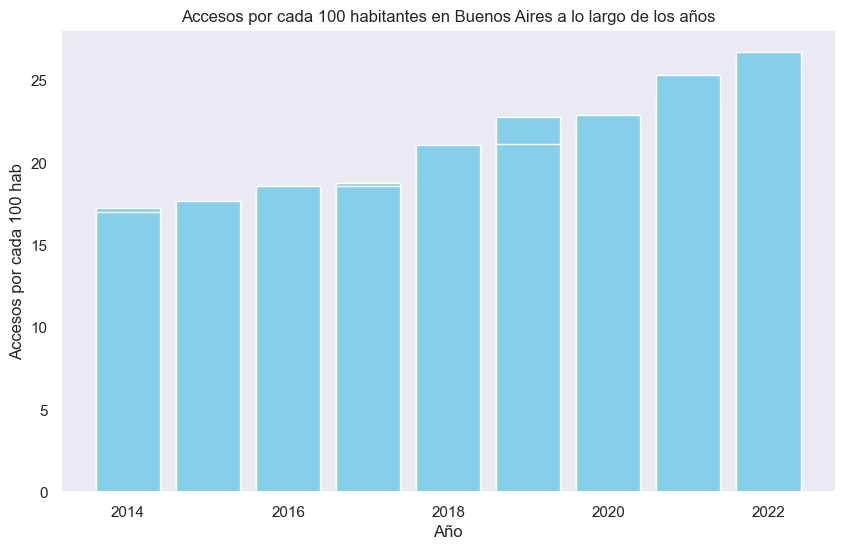

In [90]:
# Filtrar los datos para la provincia de interés (Buenos Aires)
datos_buenos_aires = penetracion_casas[penetracion_casas['Provincia'] == 'Buenos Aires']

# Preparar los datos para el gráfico de barras
años = datos_buenos_aires['Año']
accesos_por_100_hab = datos_buenos_aires['Accesos por cada 100 hab']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(años, accesos_por_100_hab, color='skyblue')

# Configuración del gráfico
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')
plt.title('Accesos por cada 100 habitantes en Buenos Aires a lo largo de los años')

# Mostrar el gráfico
plt.show()

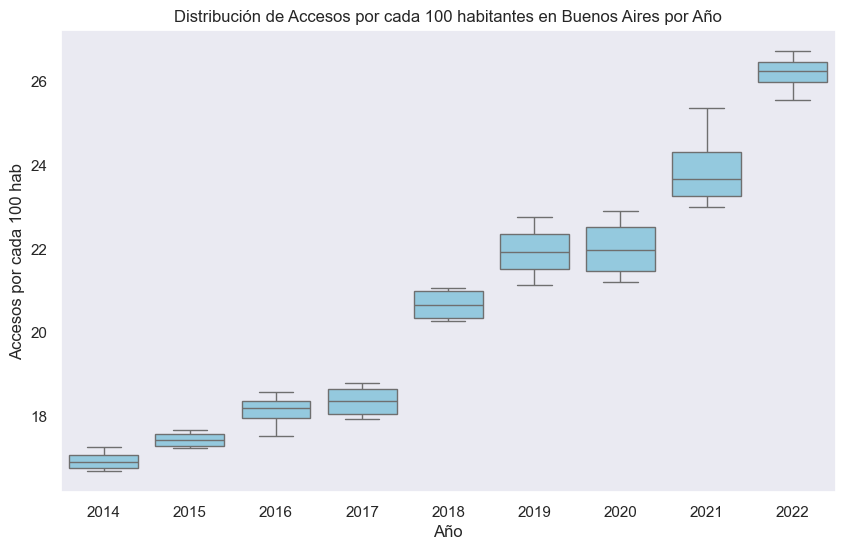

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para la provincia de interés (Buenos Aires)
datos_buenos_aires = penetracion_casas[penetracion_casas['Provincia'] == 'Buenos Aires']

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Año', y='Accesos por cada 100 hab', data=datos_buenos_aires, color='skyblue')

# Configuración del gráfico
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')
plt.title('Distribución de Accesos por cada 100 habitantes en Buenos Aires por Año')

# Mostrar el boxplot
plt.show()


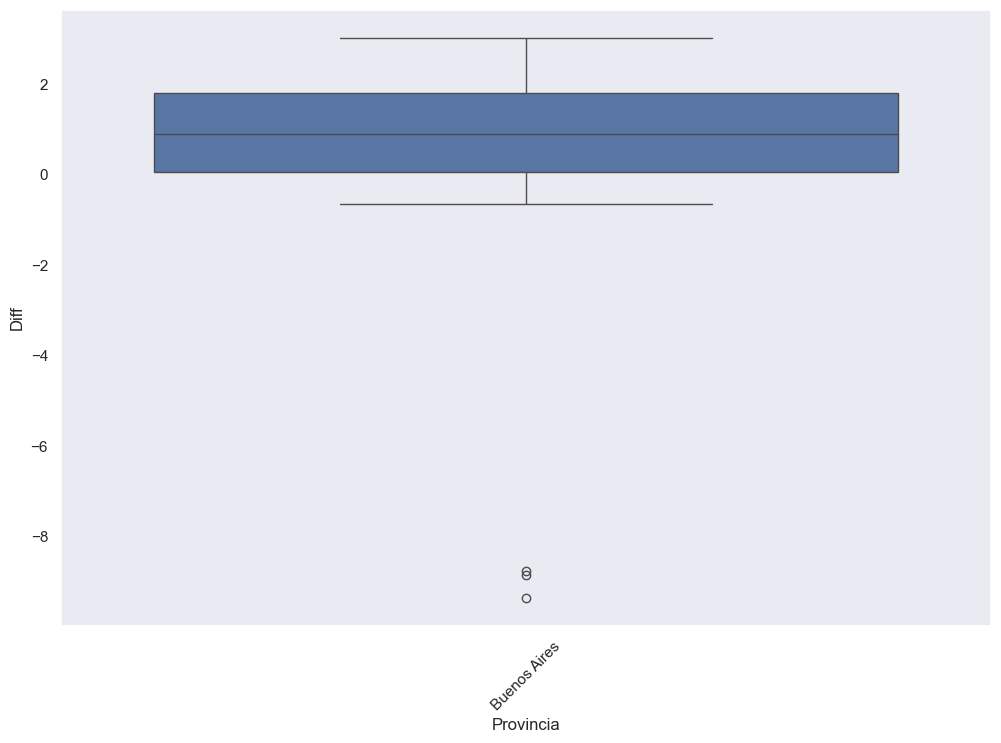

In [82]:

eje1 = penetracion_casas.loc[penetracion_casas['Provincia'] == 'Buenos Aires']['Provincia']
eje2 = penetracion_casas.loc[penetracion_casas['Provincia'] == 'Buenos Aires']['Diff']

# Tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un boxplot
sns.boxplot(x=eje1, y=eje2)

# Rotar los títulos del eje x
plt.xticks(rotation=45)

# Mostrar el boxplot
plt.show()


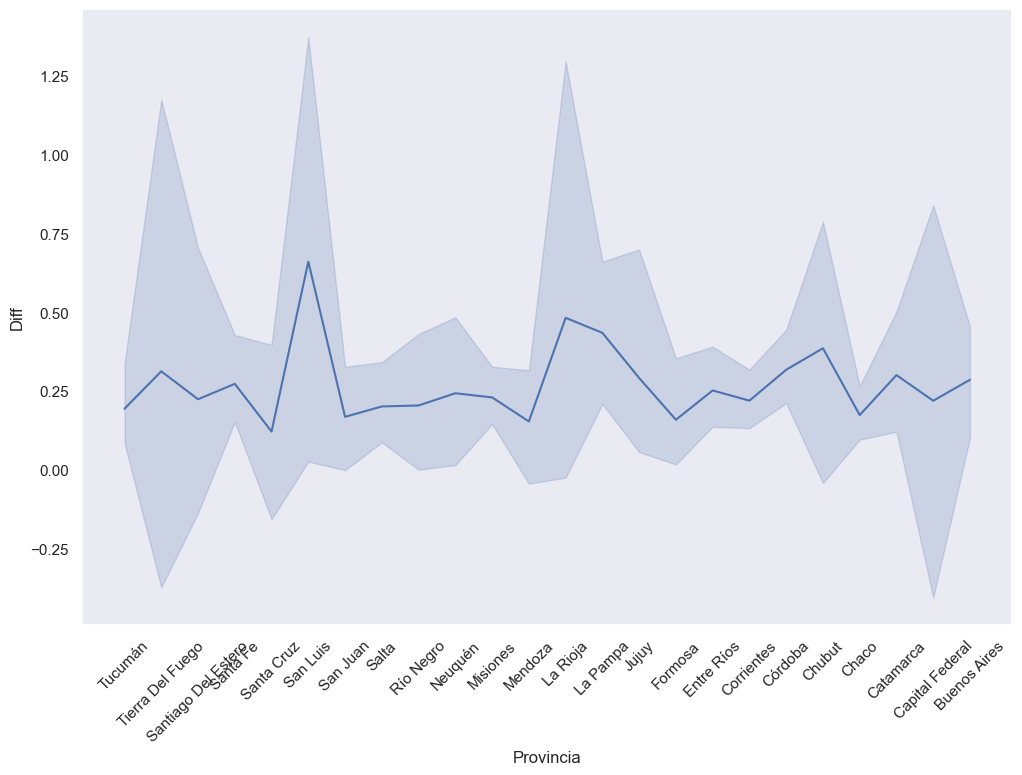

In [43]:
# Tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un gráfico de líneas
sns.lineplot(x=penetracion_casas['Provincia'], y=penetracion_casas['Diff'])

# Rotar los títulos del eje x
plt.xticks(rotation=45)

# Mostrar el gráfico de líneas
plt.show()

In [9]:
internet_penetracion = pd.read_csv(r'..\Data\Internet_Penetracion_hogares.csv')

internet_penetracion.loc[internet_penetracion['Provincia'] == 'Tierra Del Fuego']

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
22,2022,4,Tierra Del Fuego,101
46,2022,3,Tierra Del Fuego,100
70,2022,2,Tierra Del Fuego,100
94,2022,1,Tierra Del Fuego,98
118,2021,4,Tierra Del Fuego,98
142,2021,3,Tierra Del Fuego,95
166,2021,2,Tierra Del Fuego,68
190,2021,1,Tierra Del Fuego,77
214,2020,4,Tierra Del Fuego,76
238,2020,3,Tierra Del Fuego,77


In [16]:
velocidad_internet = pd.read_csv(r'..\Data\historico_velocidad_internet.csv')

In [17]:
velocidad_internet['Mbps (Media de bajada)'] = round(velocidad_internet['Mbps (Media de bajada)'],2)

In [21]:
velocidad_internet['Mbps (Media de bajada)'] = velocidad_internet['Mbps (Media de bajada)'].astype(str).replace('.',',')

In [26]:
velocidad_internet['Mbps (Media de bajada)'] = velocidad_internet['Mbps (Media de bajada)'].str.replace(".", ",", case=False, regex=False)

In [28]:
velocidad_internet.to_csv(r'..\Data\historico_velocidad_internet.csv')